# Pymaceuticals Inc.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [2]:
mouse_metadata_path = r"C:\Users\kashi\OneDrive\Desktop\Mouse_metadata.csv"
study_results_path = r"C:\Users\kashi\OneDrive\Desktop\Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [3]:
df = pd.merge(mouse_metadata, study_results, how="inner", on=["Mouse ID", "Mouse ID"])
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
df['Mouse ID'].nunique()

249

In [5]:
duplicates = df[df.duplicated(['Mouse ID', 'Timepoint'], keep=False)]  # getting duplicate records with respect to mouseid/timepoint
mouse_ids_with_duplicates = duplicates['Mouse ID'].unique()
mouse_ids_with_duplicates

array(['g989'], dtype=object)

In [6]:
#df_unique = df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])   # dropping duplicate records with respect to mouseid/timepoint
#df_unique


df_filtered = df[~df['Mouse ID'].isin(mouse_ids_with_duplicates)]  #   #  clean DataFrame by dropping the duplicate mouse by its ID.
df_filtered

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
df_filtered['Mouse ID'].nunique()   #the number of mice in the clean DataFrame.

248

## Summary Statistics

groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem']) --> multiple aggregation
.rename(columns={'mean': 'Mean Tumor Volume', 'median': 'Median Tumor Volume', 'var': 'Tumor Volume Variance', 'std': 'Tumor Volume Std. Dev.', 'sem': 'Tumor Volume Std. Err.'})  --> to rename the aggregated columns

In [8]:
summary_df = df_filtered.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem']).rename(columns={'mean': 'Mean Tumor Volume', 'median': 'Median Tumor Volume', 'var': 'Tumor Volume Variance', 'std': 'Tumor Volume Std. Dev.', 'sem': 'Tumor Volume Std. Err.'})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


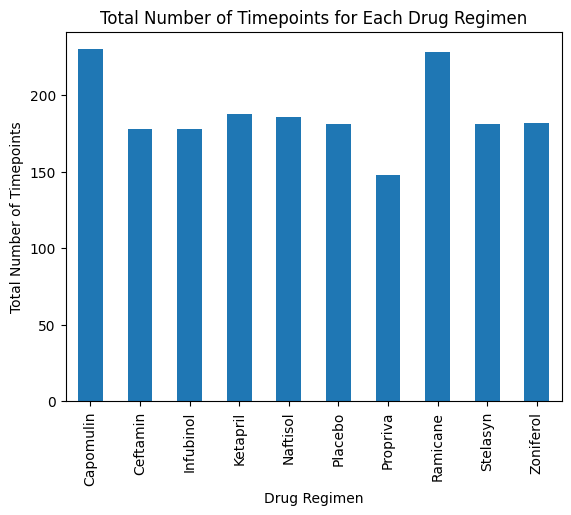

In [9]:
timepoint_counts = df_filtered.groupby('Drug Regimen')['Timepoint'].count()

# Create the bar plot using pandas
ax = timepoint_counts.plot(kind='bar')

ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Total Number of Timepoints')
ax.set_title('Total Number of Timepoints for Each Drug Regimen')

# Display the plot
plt.show()

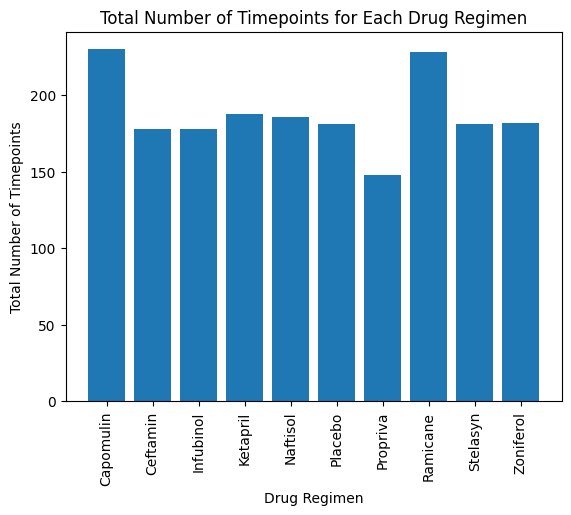

In [10]:


timepoint_counts = df_filtered.groupby('Drug Regimen')['Timepoint'].count()
drug_regimens = timepoint_counts.index
counts = timepoint_counts.values

# Create the bar plot using pyplot
plt.bar(drug_regimens, counts)


plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Timepoints')
plt.title('Total Number of Timepoints for Each Drug Regimen')

# Rotate the x-axis labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()


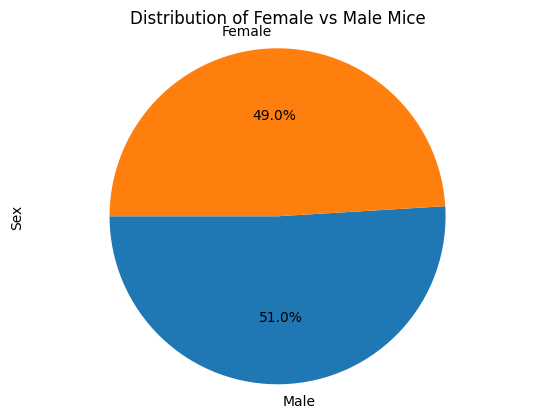

In [11]:
# Count the number of female and male mice
gender_counts = df_filtered['Sex'].value_counts()

# Create the pie plot using pandas
gender_counts.plot.pie(autopct='%1.1f%%', startangle=180)
plt.title('Distribution of Female vs Male Mice')
plt.axis('equal')
plt.show()


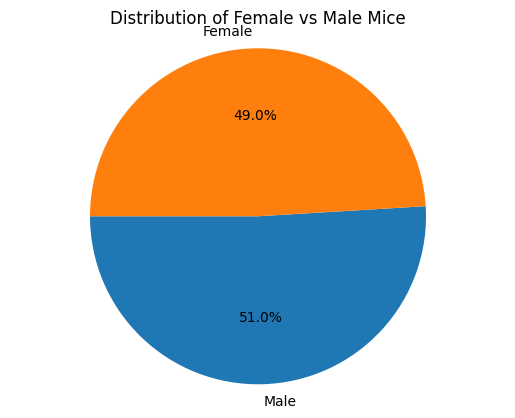

In [12]:
gender_counts = df_filtered['Sex'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180)
plt.title('Distribution of Female vs Male Mice')

plt.axis('equal')

plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
#A DatFrame that has the last timepoint for each mouse ID
last_timepoint = df_filtered.groupby('Mouse ID')['Timepoint'].max()
maximum_timepoint = pd.merge(df_filtered, last_timepoint, on=['Mouse ID', 'Timepoint'])
print(last_timepoint)
maximum_timepoint

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


Treatment: Capomulin
Interquartile Range (IQR): 7.781863460000004
Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Treatment: Ramicane
Interquartile Range (IQR): 9.098536719999998
Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Treatment: Infubinol
Interquartile Range (IQR): 11.477135160000003
Outliers: 74    36.321346
Name: Tumor Volume (mm3), dtype: float64
Treatment: Ceftamin
Interquartile Range (IQR): 15.577752179999997
Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


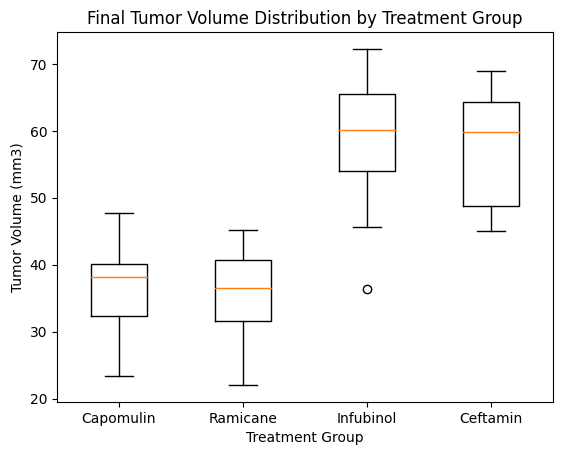

In [14]:
last_timepoint = df_filtered.groupby('Mouse ID')['Timepoint'].max()
df_last_timepoint = pd.DataFrame({'Mouse ID': last_timepoint.index, 'Timepoint': last_timepoint.values})
maximum_timepoint = pd.merge(df_filtered, df_last_timepoint, on=['Mouse ID', 'Timepoint'])


# Task 2: Reset the index of the DataFrame
df_last_timepoint = df_last_timepoint.reset_index(drop=True)



# Task 4: Create a list of the four treatment groups
treatment_groups = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Task 5: Create an empty list to fill with tumor volume data
tumor_volumes = []

# Task 6: Calculate the interquartile range (IQR) and identify outliers for each treatment group
for treatment in treatment_groups:
    boolean_mask = maximum_timepoint['Drug Regimen'] == treatment
    filtered_df = maximum_timepoint.loc[boolean_mask]
    volume = filtered_df['Tumor Volume (mm3)']
    
    tumor_volumes.append(volume)
    quartiles = volume.quantile([0.25, 0.5, 0.75])
    lower_bound = quartiles[0.25] - 1.5 * (quartiles[0.75] - quartiles[0.25])
    upper_bound = quartiles[0.75] + 1.5 * (quartiles[0.75] - quartiles[0.25])
    outliers = volume.loc[(volume < lower_bound) | (volume > upper_bound)]
    print(f'Treatment: {treatment}')
    print(f'Interquartile Range (IQR): {quartiles[0.75] - quartiles[0.25]}')
    print(f'Outliers: {outliers}')

# Task 7: Generate a box plot showing the distribution of the final tumor volume for each treatment group
plt.boxplot(tumor_volumes, labels=treatment_groups)
plt.xlabel('Treatment Group')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Final Tumor Volume Distribution by Treatment Group')
plt.show()


## Line and Scatter Plots

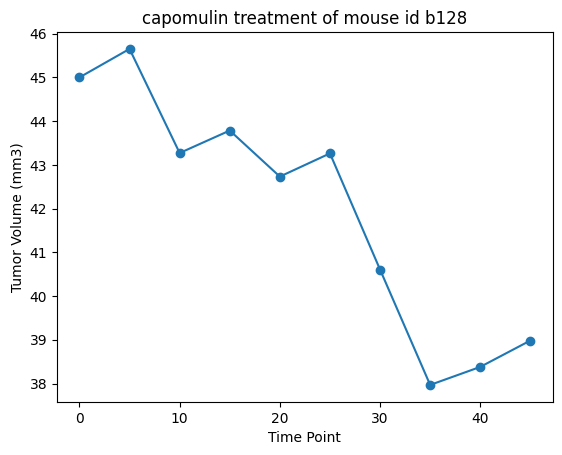

In [15]:
b128 = df_filtered[(df_filtered['Mouse ID'] == 'b128') & (df_filtered['Drug Regimen'] == 'Capomulin')]
plt.plot(b128["Timepoint"], b128["Tumor Volume (mm3)"], marker="o")

# Set the plot title and labels
plt.title('capomulin treatment of mouse id b128')
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")

# Display the plot
plt.show()

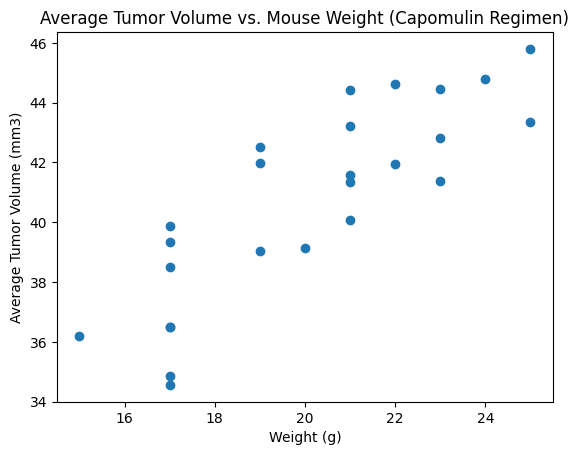

In [16]:
capomulin_df = df_filtered[df_filtered['Drug Regimen'] == 'Capomulin']

# Group by 'Mouse ID' and 'Weight (g)' and calculate average tumor volume
avg_tumor_volume = capomulin_df.groupby(['Mouse ID', 'Weight (g)'])['Tumor Volume (mm3)'].mean().reset_index()

# Create scatter plot
plt.scatter(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Mouse Weight (Capomulin Regimen)')
plt.show()


Correlation Coefficient: 0.8419363424694721
P-value: 1.3225722434712372e-07
Slope: 0.9544396890241049
Intercept: 21.552160532685008
R-squared: 0.7088568047708723


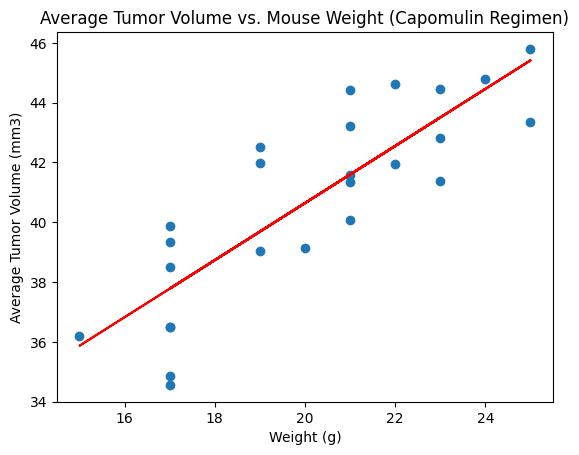

In [17]:

weight = avg_tumor_volume['Weight (g)']
tumor_volume = avg_tumor_volume['Tumor Volume (mm3)']

# Calculate the correlation coefficient
correlation_coefficient, p_value = st.pearsonr(weight, tumor_volume)
print("Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(weight, tumor_volume)
print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared:", r_value**2)

# Plot the scatter plot and linear regression line
plt.scatter(weight, tumor_volume)
plt.plot(weight, intercept + slope * weight, color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Mouse Weight (Capomulin Regimen)')
plt.show()
